In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

#modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv('stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#prepare for x and y variable 

X=df.drop(columns=['math_score'],axis=1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
y = df['math_score']

In [9]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [11]:
num_feature=X.select_dtypes(exclude="object").columns
cat_features= X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OnHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_feature)
    ]
)

In [12]:
X=preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [39]:
X = df.drop('math_score', axis=1)  # Features
y = df['math_score']  # Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(800, 7) (800,)
(200, 7) (200,)


In [40]:
# Create an Evaluate Function to give all metrics after model Training

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)  # ✅ Use a different variable name
    return mae, rmse, r2



In [43]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']:
    df[col] = label_encoder.fit_transform(df[col])


In [44]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbour":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XG Regressor":XGBRegressor(),
    "Cat Boosting Regressor":CatBoostRegressor(),
    "Ada Boosting":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')  


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.5876
- Mean Absolute Error: 4.4947
- R2 Score: 0.8615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3175
- Mean Absolute Error: 4.1301
- R2 Score: 0.8838


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4474
- Mean Absolute Error: 5.0928
- R2 Score: 0.8156
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3196
- Mean Absolute Error: 4.9831
- R2 Score: 0.8359


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.5878
- Mean Absolute Error: 4.4942
- R2 Score: 0.8615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3195
- Mean Absolute Error: 4.1310
- R2 Score: 0.8837


K-Neighbour
Model performance for Training set
- Root Mean Squared Error: 7.1768
- Mean Absolute Error: 5.7588
- R2 Score: 0.7715
---------------------------------

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)



,Model Name,R2_Score
0,Linear Regression,0.883803
2,Ridge,0.883713
8,Ada Boosting,0.849367
7,Cat Boosting Regressor,0.849097
5,Random Forest Regressor,0.845555
1,Lasso,0.835876
6,XG Regressor,0.824909
4,Decision Tree,0.737916
3,K-Neighbour,0.662020


In [46]:

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.38


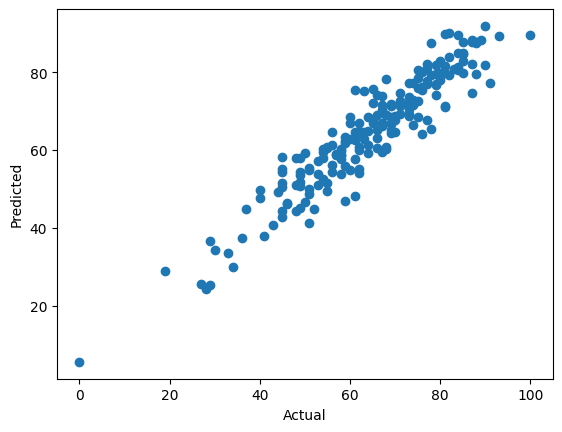

In [47]:

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

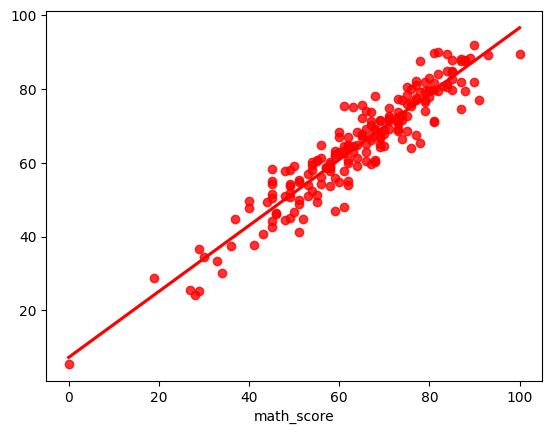

In [48]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [49]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.118557,13.881443
737,53,57.073580,-4.073580
740,80,79.357668,0.642332
660,74,77.150932,-3.150932
411,84,84.912837,-0.912837
...,...,...,...
408,52,44.903648,7.096352
332,62,59.926534,2.073466
208,74,66.529192,7.470808
613,65,67.953852,-2.953852
